# Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


# Шаблон ноутбука

In [ ]:
# Отрисовка графиков
import matplotlib.pyplot as plt

# Для загрузки датасета
from sklearn.datasets import load_wine

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Основные слои
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Dense,
    Dropout,
    Input,
)

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

### Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

### Загрузка данных

In [4]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


### Подготовка данных

In [5]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


### Создание и обучение модели

In [7]:
# ваше решение
drop_rate = 0.1 # Вероятность отсева нейронов
model = Sequential() # Создание последовательной модели

model.add(Input(shape=(13,)))  # Входной слой с 13 признаками
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(3, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"],
)

history = model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1,
)

_, acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Точность на тестовой выборке: {acc * 100:.2f}%")

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.3523 - loss: 1.3380 - val_accuracy: 0.2500 - val_loss: 6.1616
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5353 - loss: 0.9318 - val_accuracy: 0.2500 - val_loss: 6.5635
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6696 - loss: 0.7174 - val_accuracy: 0.2500 - val_loss: 6.3346
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7617 - loss: 0.5537 - val_accuracy: 0.2500 - val_loss: 5.8821
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7960 - loss: 0.5205 - val_accuracy: 0.2500 - val_loss: 5.3613
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7875 - loss: 0.5339 - val_accuracy: 0.2500 - val_loss: 4.7754
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7467 - loss: 0.5294 - val_accuracy: 0.2500 - val_loss: 4.2585
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8286 - loss: 0.4398 - val_accuracy: 0.2500 - val_loss

In [8]:
model.summary() # Вывод информации о модели

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,947 (1.62 MB)

 Trainable params: 140,803 (550.01 KB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 281,608 (1.07 MB)

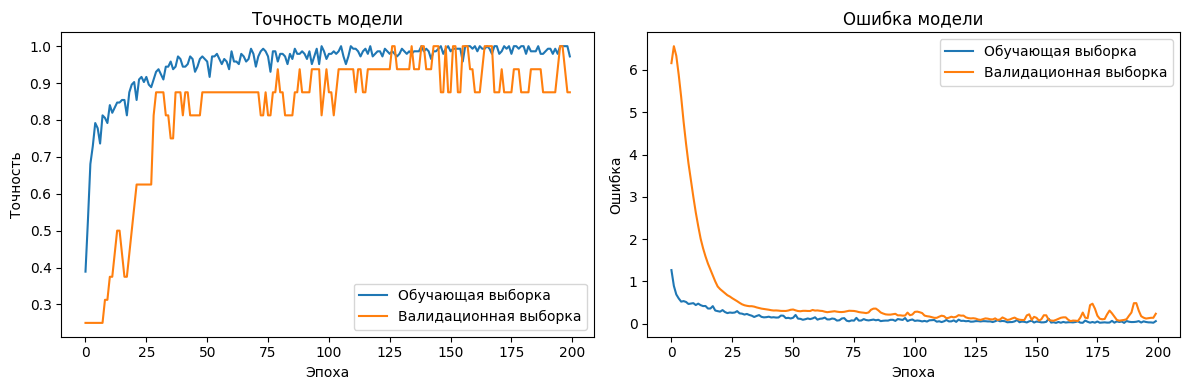

In [9]:
# Построение графиков точности
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Валидационная выборка')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

# Построение графиков ошибок
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Валидационная выборка')
plt.title('Ошибка модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()

plt.tight_layout()
plt.show()
